In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns


In [34]:
df = pd.read_csv('police.csv')

### Data preprocessing

In [35]:
df.tail(10)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
91731,RI,2015-12-31,13:23,NaN,M,White,Speeding,Speeding,False,NaN,N/D,False,16-30 Min,False,Zone X1
91732,RI,2015-12-31,18:59,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K2
91733,RI,2015-12-31,19:13,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,16-30 Min,False,Zone K3
91734,RI,2015-12-31,20:20,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K2
91735,RI,2015-12-31,20:50,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K2
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3
91740,RI,2015-12-31,22:47,NaN,M,White,Registration Violation,Registration/plates,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [36]:
df.drop(['county_name'], axis='columns', inplace=True)
df.drop(['state'], axis='columns', inplace=True)


In [37]:
df.info()
df['is_arrested'] = df.is_arrested.astype('bool')
df['date_time'] = pd.to_datetime(df['stop_date'] + ' ' + df['stop_time'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           91741 non-null  object
 1   stop_time           91741 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86539 non-null  object
 4   violation_raw       86539 non-null  object
 5   violation           86539 non-null  object
 6   search_conducted    91741 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86539 non-null  object
 9   is_arrested         86539 non-null  object
 10  stop_duration       86539 non-null  object
 11  drugs_related_stop  91741 non-null  bool  
 12  district            91741 non-null  object
dtypes: bool(2), object(11)
memory usage: 7.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column 

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,date_time
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00


In [18]:
df.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [21]:
df.dropna(subset=['driver_gender'],axis='rows', inplace=True)
df.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

### Violation Counts by Gender and Race

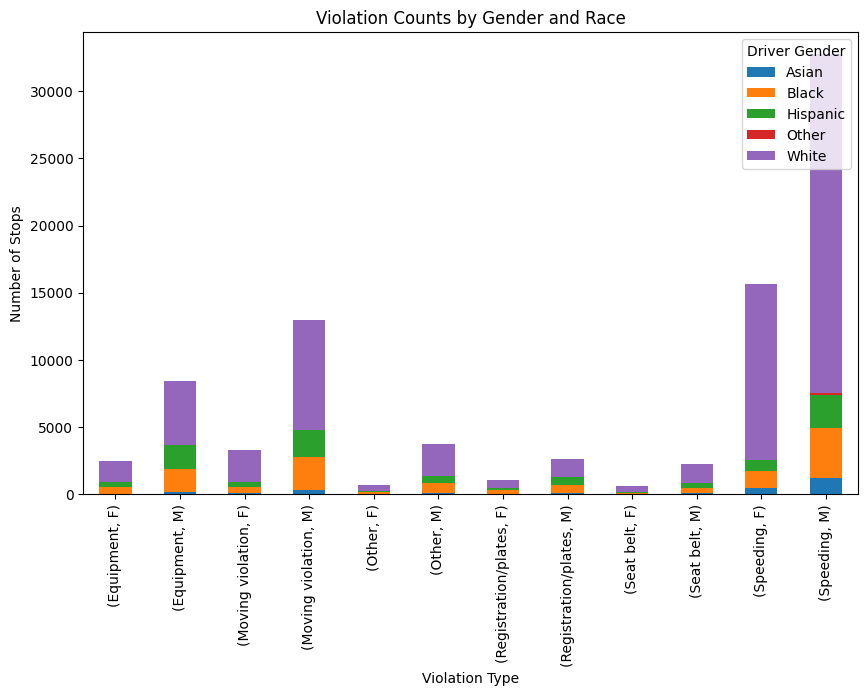

In [39]:
grouped_data = df.groupby(['violation', 'driver_gender', 'driver_race'])
stop_counts = grouped_data.size().unstack()

ax = stop_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_title('Violation Counts by Gender and Race')
ax.set_xlabel('Violation Type')
ax.set_ylabel('Number of Stops')

ax.legend(title='Driver Gender', loc='upper right')

plt.show()

##### The graph shows that the number of men who are stopped is much higher than that of women
##### And the races that make up a high percentage are white and black, the two races that have the most numbers in the that state

### Compare what violations are being caught in each zone.

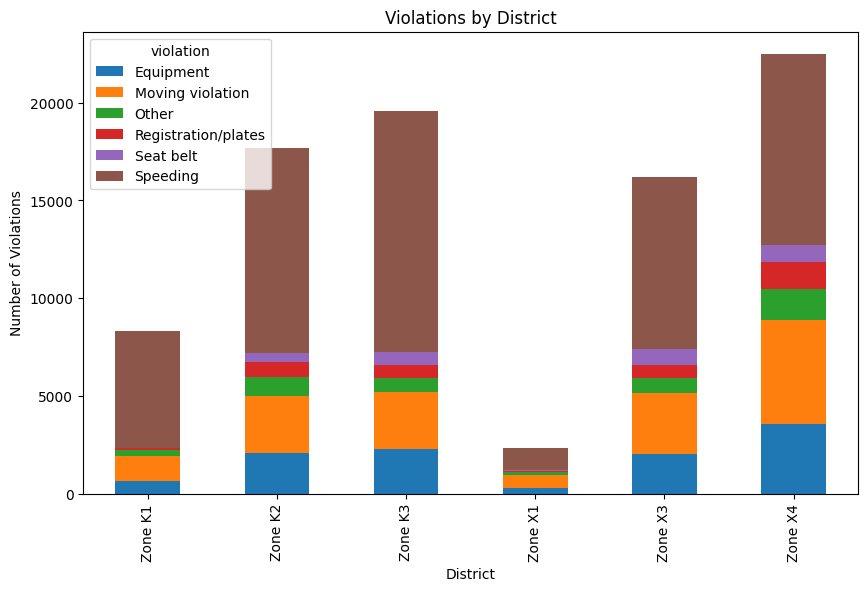

In [42]:
# Create a frequency table of violations by district
violation_by_district = pd.crosstab(df.district, df.violation)

# Plot a bar chart of the violations by district
violation_by_district.plot(kind='bar',stacked=True, figsize=(10,6))

# Add labels and title
plt.xlabel('District')
plt.ylabel('Number of Violations')
plt.title('Violations by District')
plt.show()

District with the highest number of traffic stops: Zone X4
District with the lowest number of traffic stops: Zone X1


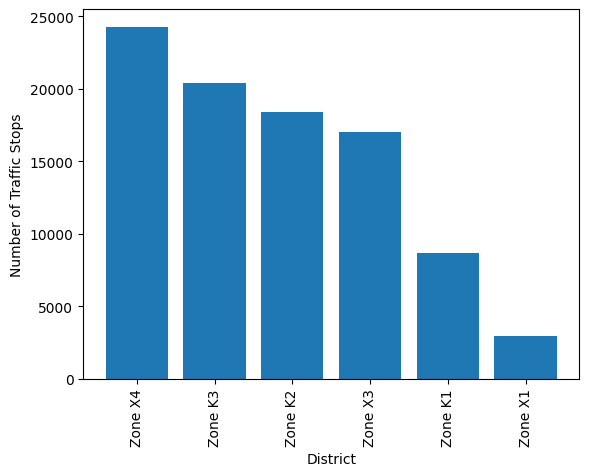

In [36]:
district_counts = df['district'].value_counts()

# sort the districts by number of traffic stops
district_counts = district_counts.sort_values(ascending=False)

# print the district with the highest and lowest number of traffic stops
print("District with the highest number of traffic stops:", district_counts.index[0])
print("District with the lowest number of traffic stops:", district_counts.index[-1])

# plot a bar chart of the number of traffic stops by district
plt.bar(district_counts.index, district_counts.values)
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Number of Traffic Stops')
plt.show()

##### The number of violations in district X4 is the highest and X1 is the lowest similar to number of traffic stops, however the terms of violations in districts are similar.


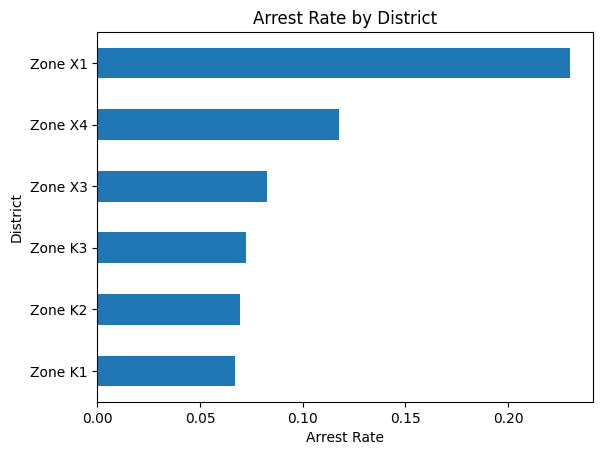

In [44]:
arrests_by_district = pd.crosstab(df.district, df.is_arrested)

arrest_rate = arrests_by_district.loc[:, True] / (arrests_by_district.loc[:, True] + arrests_by_district.loc[:, False])

arrest_rate_sorted = arrest_rate.sort_values()

arrest_rate_sorted.plot(kind='barh')
plt.title('Arrest Rate by District')
plt.xlabel('Arrest Rate')
plt.ylabel('District')
plt.show()

##### Although the number of stops at X1 is the lowest, the arrest rate here is the highest, perhaps criminals will tend to choose the zones with the fewest checkpoints to go.

### Drug-related traffic stop based on the time of day or day of the week

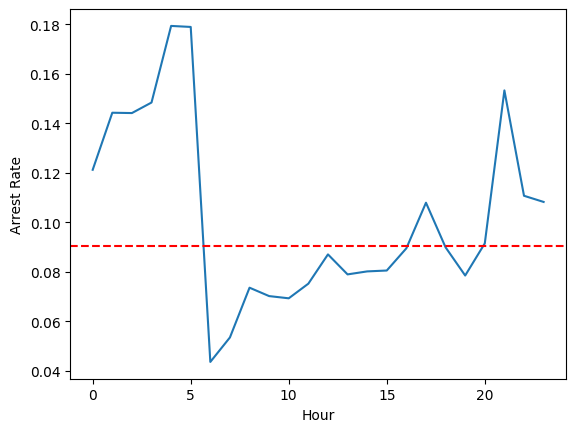

In [64]:
df['hour'] = pd.to_datetime(df['date_time']).dt.hour
arrest_rate = df['is_arrested'].mean()

hourly_arrest_rate = df.groupby(df['hour'])['is_arrested'].mean()

plt.plot(hourly_arrest_rate.index, hourly_arrest_rate)

plt.axhline(arrest_rate, color='r', linestyle='--')

plt.xlabel('Hour')
plt.ylabel('Arrest Rate')

plt.show()

#### Arrests usually happen at night (21pm to 5am)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10812\3291251235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_stops['hour'] = drug_stops['date_time'].dt.hour
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10812\3291251235.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_stops['day_of_week'] = drug_stops['date_time'].dt.dayofweek


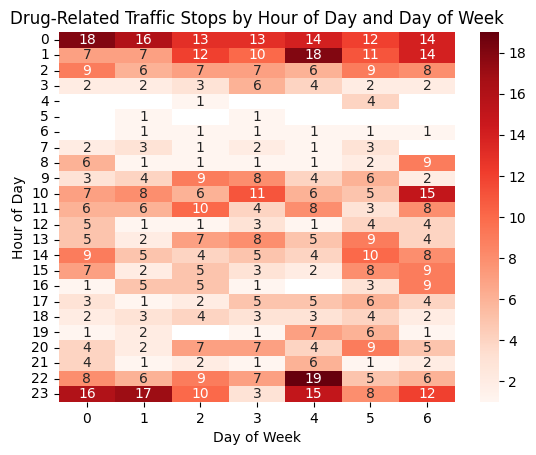

In [55]:
drug_stops = df[df['drugs_related_stop'] == True]

drug_stops['hour'] = drug_stops['date_time'].dt.hour
drug_stops['day_of_week'] = drug_stops['date_time'].dt.dayofweek

heatmap_data = drug_stops.pivot_table(values='drugs_related_stop', index='hour', columns='day_of_week', aggfunc='sum')

sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='g')

plt.title('Drug-Related Traffic Stops by Hour of Day and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')

plt.show()

#### Drug-related stops mostly occurred at night (22pm-2am) and were similar on all days of the week.

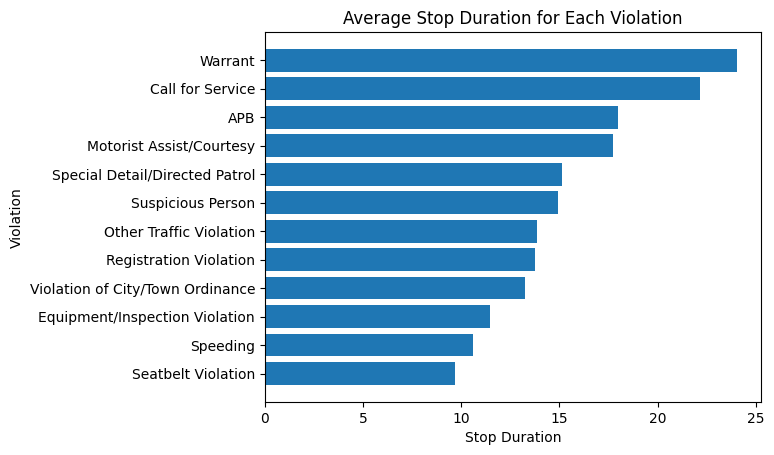

In [62]:
violation_duration = df.groupby('violation_raw')['stop_duration'].mean().sort_values()

plt.barh(y=violation_duration.index, width=violation_duration.values)

plt.xlabel('Stop Duration')
plt.ylabel('Violation')
plt.title('Average Stop Duration for Each Violation')

plt.show()

#### The highest average stop duration was for Warrant violations at about 24 minutes, followed by Call for Service at about 23 minutes. Speeding violations had the lowest average stop duration at about 10 minutes.

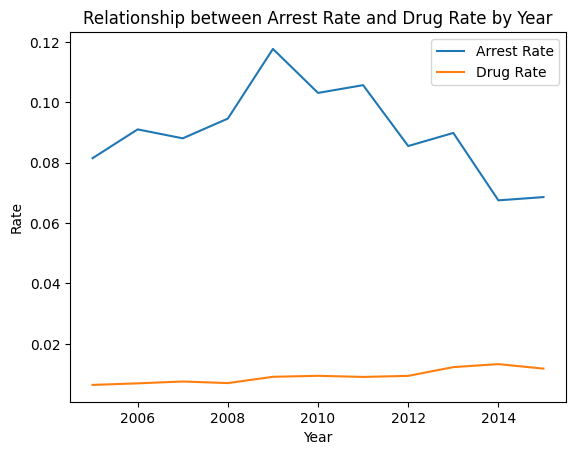

In [68]:
df['year'] = pd.to_datetime(df['date_time']).dt.year
annual_arrest_rate = df.groupby(df['year'])['is_arrested'].mean()
annual_drug_rate = df.groupby(df['year'])['drugs_related_stop'].mean()

fig, ax = plt.subplots()
ax.plot(annual_arrest_rate.index, annual_arrest_rate, label='Arrest Rate')
ax.plot(annual_drug_rate.index, annual_drug_rate, label='Drug Rate')

ax.set_title('Relationship between Arrest Rate and Drug Rate by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Rate')

ax.legend()

plt.show()

#### This suggests that while law enforcement officers were making fewer arrests overall, they were more likely to find drugs during traffic stops.

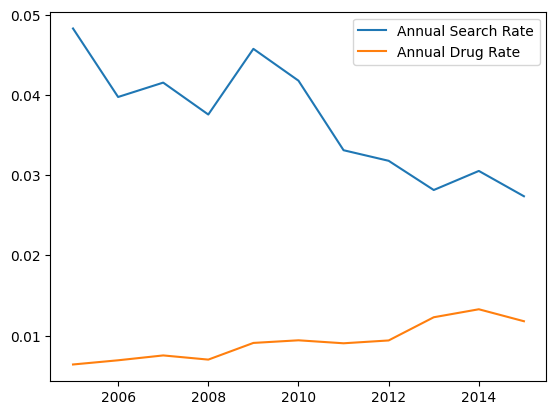

In [61]:
df['year'] = pd.to_datetime(df['date_time']).dt.year
annual_search_rate = df.groupby(df['year'])['search_conducted'].mean()

annual_drug_rate = df.groupby(df['year'])['drugs_related_stop'].mean()
plt.plot(annual_search_rate, label='Annual Search Rate')
plt.plot(annual_drug_rate, label='Annual Drug Rate')
plt.legend()
plt.show()

#####  The rate of vehicle searches decreased while the rate of drug-related stops increased, it's possible that the increase in drug-related stops was due to factors other than the rate of searches, such as an increase in drug-related crimes in the area.